run with ivy kernel


In [3]:
from matplotlib import animation
from IPython.display import HTML
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np

class DiffusiveModel:
    def __init__(self, x,y,field, spacing, k):
        self.x = x
        self.y = y
        self.field = field
        self.dx = spacing[0]
        self.dy = spacing[1]
        self.k = k
        
    def plot_field(self):
        fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
        surf = ax.plot_surface(self.x,self.y,self.field, cmap=cm.coolwarm,linewidth=0,antialiased=False)
        fig.colorbar(surf, shrink=0.5,aspect=5)
        plt.show()
    def calc_stable_time_step(self, C=0.1):
        self.dt = C * self.dx * self.dy / self.k
    def run_one_step(self):
        grad_x = np.gradient(self.field, self.dx, axis=1)
        grad_y = np.gradient(self.field, self.dy, axis=0)
        flux_x = -self.k * np.gradient(grad_x,self.dx, axis=1)
        flux_y = -self.k * np.gradient(grad_y,self.dy, axis=0)
        rate = self.dt * (flux_x + flux_y)
        self.field -= rate
    

Stable run time dt = 1.0


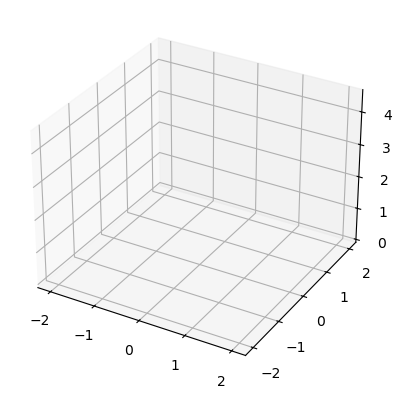

In [4]:

# Generate a starting condition
x = np.linspace(-2, 2, 20)
y = np.linspace(-2, 2, 20)
X, Y = np.meshgrid(x, y)
field = 5.0 * np.exp(-4 * (X**2 + Y**2))

# Define model parameters
spacing = (1.0, 1.0)
diffusivity = 0.1

# 5a) Initialize your model
model = DiffusiveModel(X,Y,field,spacing,diffusivity)

# 5b) Plot the initial condition
# model.plot_field()

# 5c) Calculate the stable time step
model.calc_stable_time_step()
print(f'Stable run time dt = {model.dt}')

# 5d) Run the model for 1 hour
from matplotlib import animation
artists = []

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(model.x,model.y,model.field.copy(), cmap=cm.coolwarm,linewidth=0,antialiased=False)
# fig.colorbar(surf, shrink=0.5,aspect=5)
artists.append([surf])

for i in range(60):
    model.run_one_step()
    if i % 1 == 0:
        container = ax.plot_surface(model.x,model.y,model.field.copy(), cmap=cm.coolwarm,linewidth=0,antialiased=False)
        # fig.colorbar(container, shrink=0.5,aspect=5)
        artists.append([container])

# 5e) Plot the final result
# model.plot_field()
ani = animation.ArtistAnimation(fig=fig, artists=artists, interval=100)
HTML(ani.to_jshtml())